In [5]:
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
from scipy.io import loadmat, savemat
from matplotlib.colors import LogNorm
import math

In [6]:
# dictionary = np.load('2015/Fall.npz', allow_pickle = True)
# FallData = dictionary.item()

# dictionary = np.load('2015/Spring.npz', allow_pickle = True)
# SpringData = dictionary.item()

# dictionary = np.load('2015/Summer.npz', allow_pickle = True)
# SummerData = dictionary.item()

#dictionary = np.load('2015/Winter.npz', allow_pickle = True)
# print(dictionary["H"][0])
# print(len(dictionary["XX"]))
# print(len(dictionary["YY"]))

In [8]:
# filepath = '/Volumes/lairdata/lightningdata/GLD_cleaned/2017-11-27/GLD-201711270000-cleaned.mat'
# mat = loadmat(filepath).get("flashes") # not used, not used, latitude, longitude, peak current 

In [9]:
dictionary = np.load('2015/Spring.npz', allow_pickle = True)

/var/folders/5t/z5lg7gj54bj64jvzp0cdt58r0000gn/T/ipykernel_25347/3870108947.py:77: UserWarning: Warning: converting a masked element to nan.
  CS = m.pcolormesh(dictionary["XX"],dictionary["YY"], np.array(newH), alpha = 0.85, shading='auto',cmap=plt.cm.viridis, norm = LogNorm(vmin = np.nanmin(newH), vmax = np.nanmax(newH))) # pcolormesh
/Users/catherinexiao/opt/anaconda3/envs/map_env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: UserWarning: Warning: converting a masked element to nan.
  a = np.asanyarray(a)


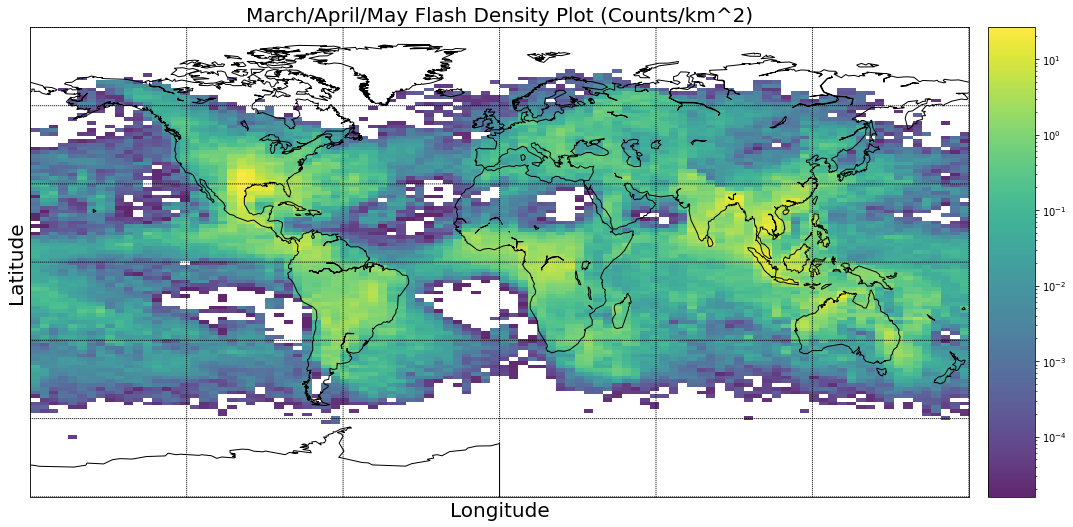

In [10]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c') # creating basemap object
# lons = mat[:,3]
# lats = mat[:,2] # placeholder
# values = mat[:,4] # placeholder
# x, y = m(lons, lats) # basemap instance calculates the position of point in map coordinates, x binned along 1st dimension and y binned along 2nd dimension

# # H is the values in each bin
# # xedges are the bin edges along 1st dimension (lon)
# # yedges are the ones along 2nd dimension (lat)
# # for the count statistic, values not referenced since count computes count of points (lat lon coordinates) in each bin
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic_2d.html
# H, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d(x, y, values, statistic="mean", bins=100, range=None, expand_binnumbers=False) 
# #H = np.ma.masked_where(H==0, H) # wamasking where there was no data

# # meshgrid returns 2d array 
# # XX is the lon values: 2d array containing 100 arrays of the same xedges (lon values) 
# # YY is the lat values: 2d array containing 100 arrays from lowest to highest with each array containing 100 of the same values
# XX, YY = np.meshgrid(xedges, yedges) 

# print(xedges)
# print(yedges)
#dictionary["XX"][:,]
xedges = dictionary["XX"][0]
yedges = dictionary["YY"][:,1]
H = dictionary["H"]
H = np.ma.masked_where(H==0, H) # wamasking where there was no data

newH = []
for j in range(len(H.T)):
       latCoordinate1 = yedges[j]
       latCoordinate2 = yedges[j+1]
       averageAtLat = H.T[j]
       placeholder = []
       for i in range(len(H.T)):  
              lonCoordinate1 = xedges[i]
              lonCoordinate2 = xedges[i+1]

              # compute area of one bin using haversine formula 
              binArea = 1 
              R = 6371e3; # meters
              
              # compute dist btw 2 latitudes
              φ1 = latCoordinate1 * math.pi/180 # lat and lon in radians
              φ2 = latCoordinate2 * math.pi/180 
              Δφ = (latCoordinate2-latCoordinate1) * math.pi/180
              Δλ = (lonCoordinate1-lonCoordinate1) * math.pi/180
              a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
              c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
              d1 = (R * c) / 1000; # dist in metres

              # compute dist btw 2 longitudes
              φ1 = latCoordinate1 * math.pi/180 # lat and lon in radians
              φ2 = latCoordinate1 * math.pi/180 
              Δφ = (latCoordinate1-latCoordinate1) * math.pi/180
              Δλ = (lonCoordinate2-lonCoordinate1) * math.pi/180
              a = math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2)
              c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
              d2 = (R * c) / 1000 # dist in metres
              
              binArea = d1 * d2
              
              # dividing each peak current average by area 
              averagePeakCurrent = averageAtLat[i]/binArea
              placeholder.append(averagePeakCurrent)
              #print(placeholder)

       newH.append(placeholder)

#print(np.array(newH))
'''
array([[ 1.,  2.],
       [ 3.,  4.]]) x.T
array([[ 1.,  3.],
       [ 2.,  4.]])
'''
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c') # creating basemap object
CS = m.pcolormesh(dictionary["XX"],dictionary["YY"], np.array(newH), alpha = 0.85, shading='auto',cmap=plt.cm.viridis, norm = LogNorm(vmin = np.nanmin(newH), vmax = np.nanmax(newH))) # pcolormesh 

m.drawcoastlines()# draw coastlines, lat/lon lines.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.colorbar(location="right") # draw colorbar
plt.title('March/April/May Flash Density Plot (Counts/km^2)', fontsize=20)
plt.xlabel("Longitude" ,fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.gcf().set_size_inches(18,10)
plt.savefig("2015/2015PeakCurrentDensitySpring", facecolor='w')


In [ ]:
# TO-DO
# Plot example to see whatxedges and yedges are
# Figure out what meshgrid and colormesh do
# Load 4 seasons .mat files and compute area for longitude latitude area (km^2)
# Create flash density plot - Counts/km^2/year

# Create average peak current density plot - kA/km^2/year
